## Building Machine Learning Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
%matplotlib inline

## Importing the ml algorithms

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lg
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier as knc
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import GradientBoostingClassifier as gbc
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [3]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acs

In [4]:
df=pd.read_csv("model2.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,58,0,200,13,5,1,33,4,5,4,17288,6,34,2,2,4,40,3,4,31,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,1,35,0,711,28,4,3,90,1,5,1,41000,6,47,4,4,3,1,1,4,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
2,2,37,0,1077,16,5,3,142,2,3,2,28591,3,22,3,3,2,6,1,1,3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,3,34,1,1199,10,2,2,197,2,1,4,22968,2,2,1,4,1,7,4,3,6,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,4,48,0,184,34,3,3,123,1,3,1,16527,1,14,2,4,2,17,6,2,11,6,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1


In [6]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [7]:
len(df[df['YearsAtCompany']==1])

86014

### Creating  feature "AttritionInAYear" using YearsAtCompany column ,to see whether an employee get attritioned within a year or not

In [8]:
l = []
for i in range(len(df['Attrition'])):
    if df['YearsAtCompany'][i]==1 and df['Attrition'][i]==1:
        l.append(df['YearsAtCompany'][i])
    else:
        l.append(0)

In [9]:
len(l)

546221

In [10]:
df['AttritionInAYear']=l

In [11]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,AttritionInAYear
0,58,0,200,13,5,1,33,4,5,4,17288,6,34,2,2,4,40,3,4,31,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1,35,0,711,28,4,3,90,1,5,1,41000,6,47,4,4,3,1,1,4,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0
2,37,0,1077,16,5,3,142,2,3,2,28591,3,22,3,3,2,6,1,1,3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,34,1,1199,10,2,2,197,2,1,4,22968,2,2,1,4,1,7,4,3,6,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,48,0,184,34,3,3,123,1,3,1,16527,1,14,2,4,2,17,6,2,11,6,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,20,0,1472,41,3,1,200,3,4,4,4627,8,11,1,1,1,2,4,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
546217,60,1,1290,9,5,3,176,4,3,1,25823,0,16,3,1,1,31,3,1,17,17,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
546218,51,0,1265,50,3,4,154,2,3,1,12158,0,2,3,3,4,15,2,2,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
546219,55,0,1298,33,5,1,142,1,3,3,19790,5,26,3,4,1,29,4,4,28,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [12]:
df["AttritionInAYear"].unique()

array([0, 1], dtype=int64)

In [13]:
#df.to_csv('att_in_a_year.csv')

In [8]:
df1=pd.read_csv('att_in_a_year.csv')

In [9]:
df1

,Unnamed: 0,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,AttritionInAYear
0,0,58,0,200,13,5,1,33,4,5,4,17288,6,34,2,2,4,40,3,4,31,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1,1,35,0,711,28,4,3,90,1,5,1,41000,6,47,4,4,3,1,1,4,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0
2,2,37,0,1077,16,5,3,142,2,3,2,28591,3,22,3,3,2,6,1,1,3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,3,34,1,1199,10,2,2,197,2,1,4,22968,2,2,1,4,1,7,4,3,6,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,48,0,184,34,3,3,123,1,3,1,16527,1,14,2,4,2,17,6,2,11,6,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,546216,20,0,1472,41,3,1,200,3,4,4,4627,8,11,1,1,1,2,4,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
546217,546217,60,1,1290,9,5,3,176,4,3,1,25823,0,16,3,1,1,31,3,1,17,17,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
546218,546218,51,0,1265,50,3,4,154,2,3,1,12158,0,2,3,3,4,15,2,2,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
546219,546219,55,0,1298,33,5,1,142,1,3,3,19790,5,26,3,4,1,29,4,4,28,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [10]:
df1.drop(["Unnamed: 0","Attrition"],axis=1,inplace=True)

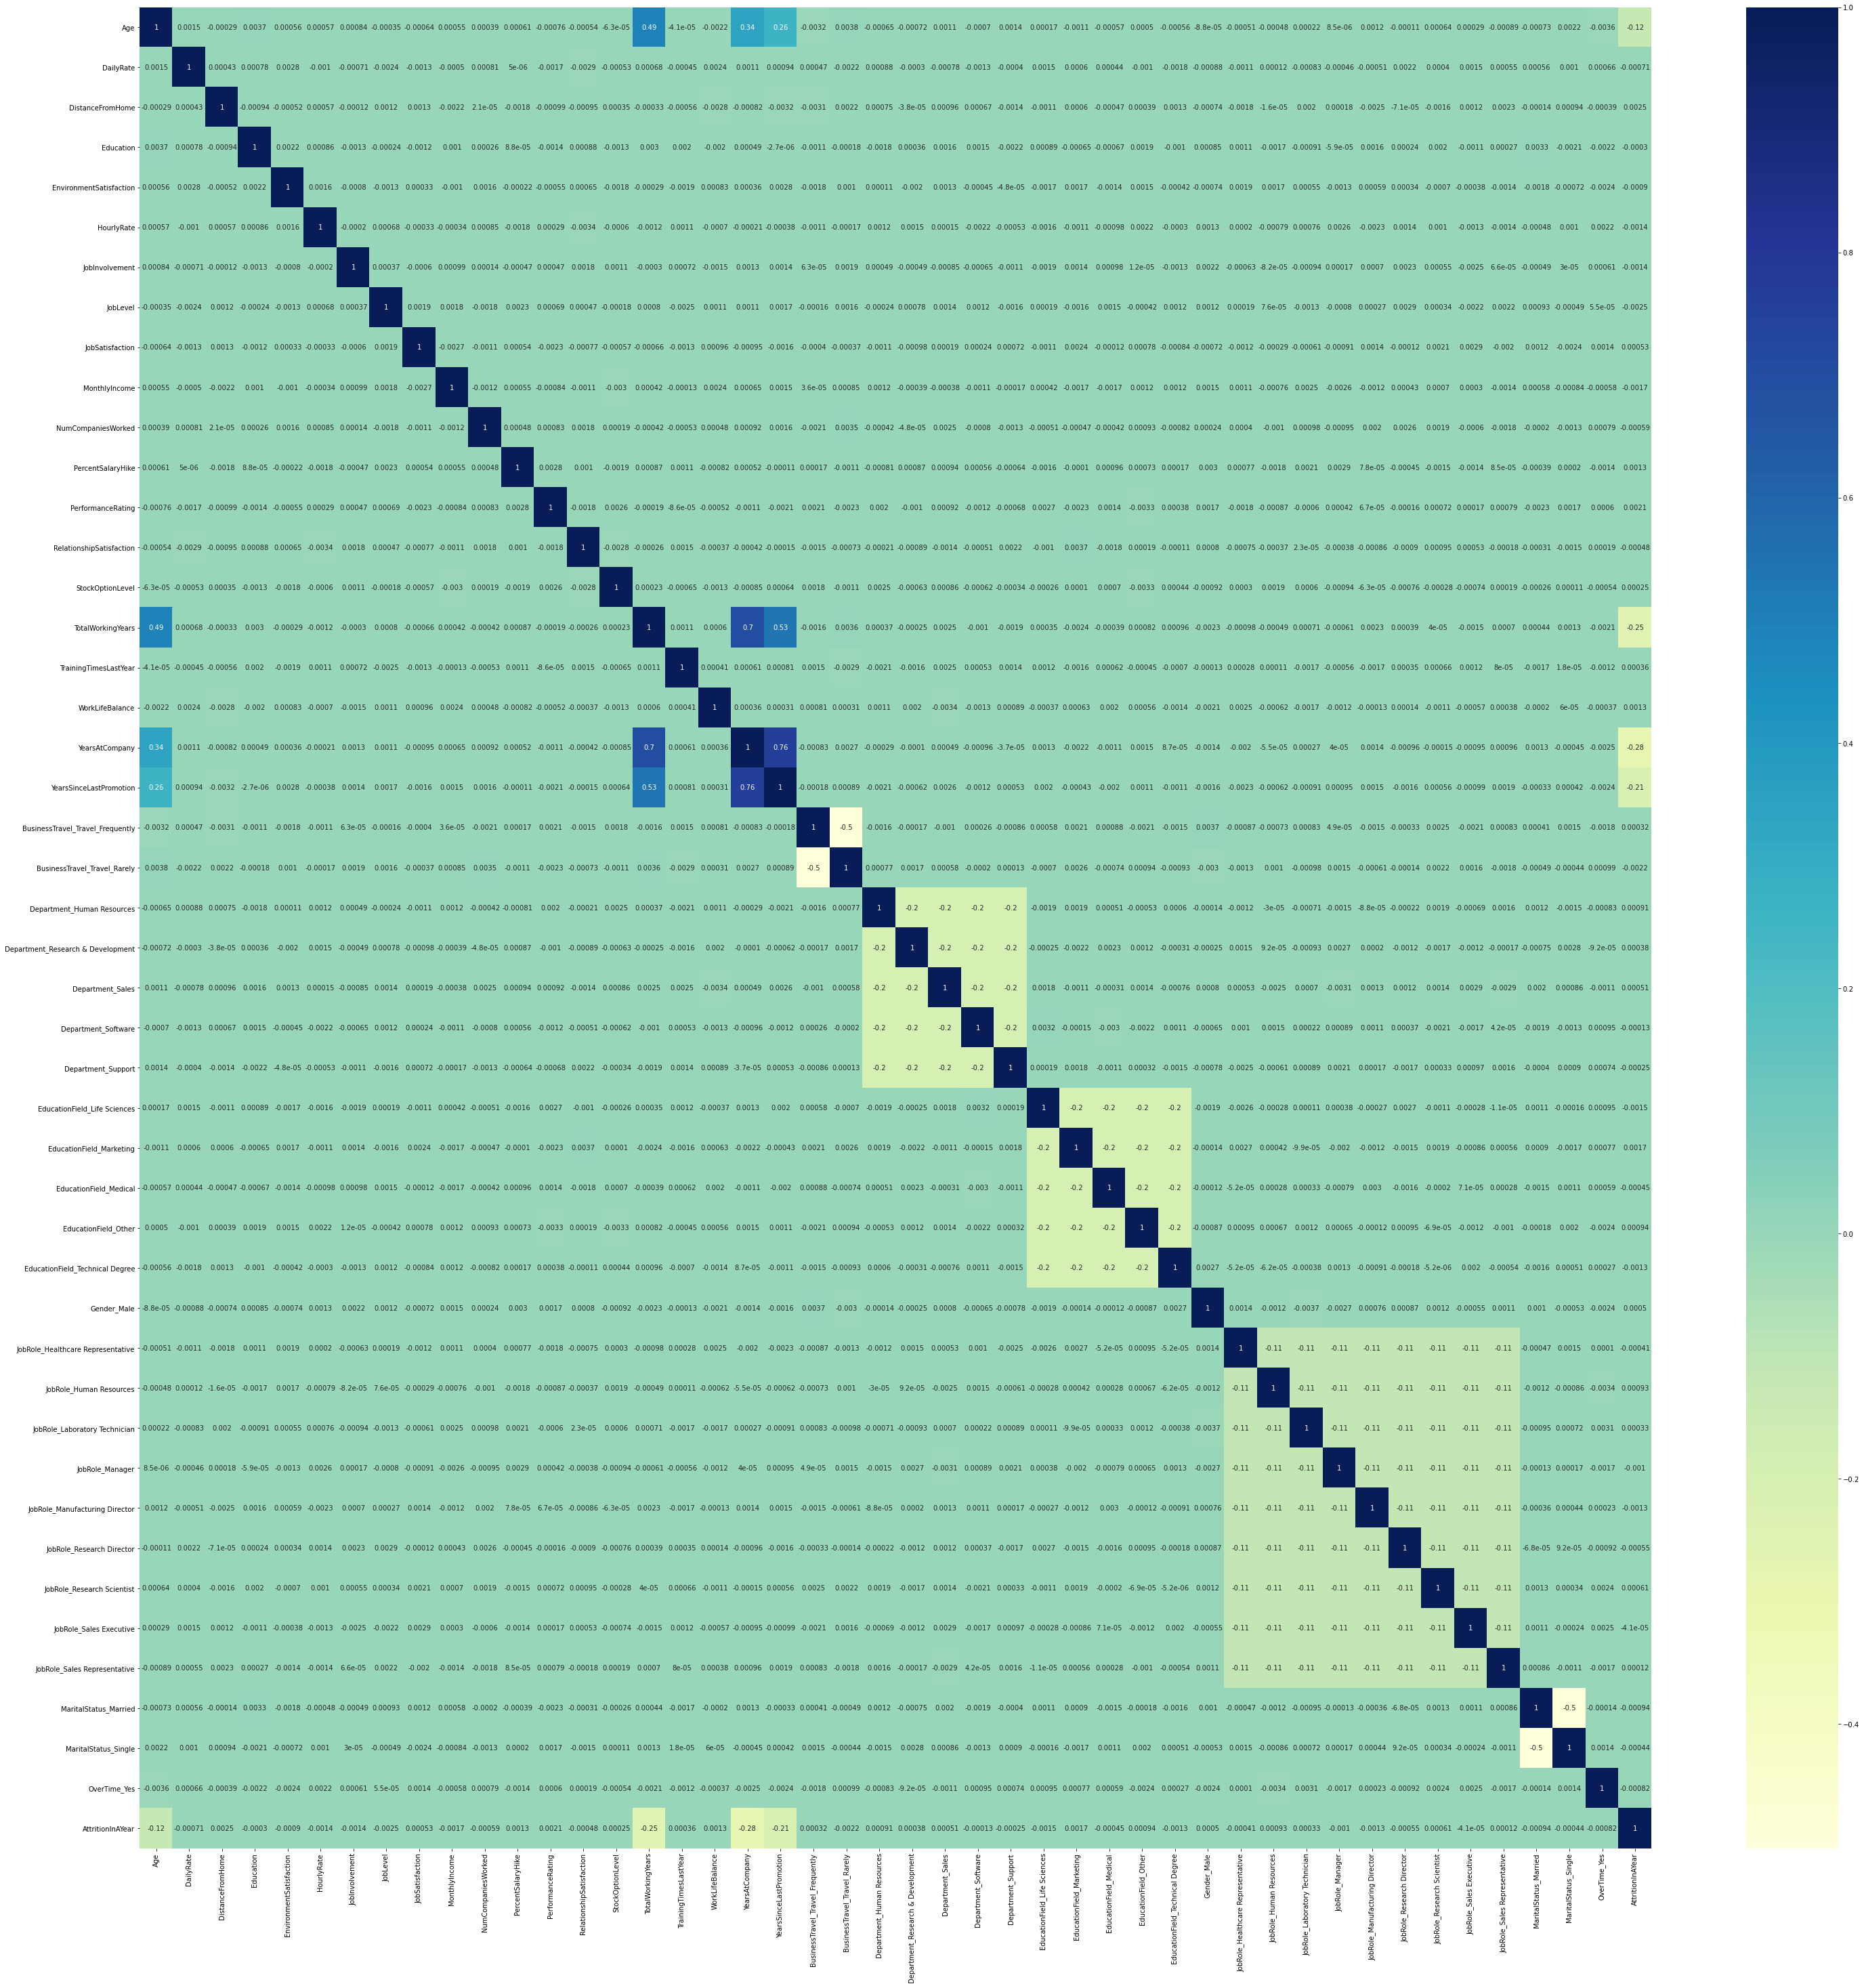

In [17]:
plt.figure(figsize=(50,50))
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [18]:
df1[df1["AttritionInAYear"]==1]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,AttritionInAYear
8,54,693,29,4,2,105,4,5,3,16467,3,20,3,1,3,13,2,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1
15,20,715,13,4,1,134,2,3,1,33793,8,5,3,1,2,1,6,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
23,34,1397,48,4,3,63,2,4,4,39555,8,49,4,4,2,1,2,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1
32,44,306,30,3,4,143,4,2,1,27823,5,46,3,4,2,1,4,4,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
34,25,339,8,5,4,138,4,3,1,45823,1,10,1,3,4,2,3,4,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546152,58,1103,12,4,2,146,1,2,4,5984,0,29,2,4,1,4,3,2,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
546156,54,158,40,1,4,118,1,3,2,11294,6,0,3,4,3,4,4,4,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
546166,48,1322,14,3,2,100,2,3,3,49953,2,48,4,3,2,16,2,3,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1
546170,23,1262,31,2,4,74,4,4,4,13521,4,4,2,4,4,4,5,3,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [19]:
df["AttritionInAYear"].value_counts()

0    503279
1     42942
Name: AttritionInAYear, dtype: int64

Observation:It can be seen that the dataset is in imbalanced form.

## Spliting the data for trianing  and testing.

In [11]:
x=df1.drop('AttritionInAYear',axis=1)
y=df1["AttritionInAYear"]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

## Handling Imbalanced Dataset

### Using Over Sampling Technique

In [13]:
from imblearn.over_sampling import SMOTE 
sm=SMOTE(random_state=2)
x_res,y_res=sm.fit_resample(x,y.ravel())

In [14]:
x_res.shape,y_res.shape

((1006558, 45), (1006558,))

In [15]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x_res,y_res,test_size = 0.2,random_state = 200)

In [16]:
x2_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
653306,58,1448,46,2,2,44,2,2,3,17732,7,15,3,2,2,5,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
108402,37,982,2,2,1,165,1,1,2,46914,8,41,4,1,4,17,3,1,7,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
819764,34,1207,37,2,1,121,2,2,1,36728,3,28,3,2,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
382514,52,1445,6,3,1,179,2,5,1,18719,1,42,2,3,2,3,5,3,3,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
972205,48,593,32,2,2,44,2,1,4,43911,0,38,4,2,3,16,3,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781098,36,994,36,2,2,123,2,4,2,40063,3,27,1,3,3,17,2,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
522052,42,537,23,3,1,67,3,4,4,16653,8,4,3,3,2,4,2,3,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
983824,23,593,47,4,1,191,1,2,3,41920,0,6,2,1,1,4,4,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12905,40,960,12,3,3,148,1,1,3,27733,3,29,2,1,4,2,6,4,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


# Training the ml models 

## Logistic Regression

In [41]:
logistic=lg().fit(x2_train,y2_train)
p12=logistic.predict(x2_test)
p12

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [42]:
print("Training Accuracy:",logistic.score(x2_train,y2_train))
print("-----------------------------------------------------------")
print("Testing Accuracy:",acs(y2_test,p12))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p12))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p12))

Training Accuracy: 0.9184994399227069
-----------------------------------------------------------
Testing Accuracy: 0.9181419885550787
-----------------------------------------------------------
confusion_matrix:
 [[88950 11715]
 [ 4764 95883]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92    100665
           1       0.89      0.95      0.92    100647

    accuracy                           0.92    201312
   macro avg       0.92      0.92      0.92    201312
weighted avg       0.92      0.92      0.92    201312



## Decision tree

In [43]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(x2_train, y2_train)
print("DecisionTreeClassifier")
p13=dtc2.predict(x2_test)
p13

DecisionTreeClassifier


array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [44]:
print("Training Accuracy:",dtc2.score(x2_train,y2_train))
print("---------------------------------------------------------")
print("Testing Accuracy:",acs(y2_test,p13))
print("---------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p13))
print("---------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p13))

Training Accuracy: 1.0
---------------------------------------------------------
Testing Accuracy: 0.9473056747734859
---------------------------------------------------------
confusion_matrix:
 [[95204  5461]
 [ 5147 95500]]
---------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95    100665
           1       0.95      0.95      0.95    100647

    accuracy                           0.95    201312
   macro avg       0.95      0.95      0.95    201312
weighted avg       0.95      0.95      0.95    201312



## Random Forest Classifier

In [17]:
classifier1= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier1.fit(x2_train, y2_train)  

#Predicting the test set result  
y_pred4= classifier1.predict(x2_test)  

In [19]:
print("Training Accuracy:",classifier1.score(x2_train,y2_train))
print("------------------------------------------------------")
print("Testing Accuracy:",acs(y2_test,y_pred4))
print("------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,y_pred4))
print("------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,y_pred4))

Training Accuracy: 0.9989320033877847
------------------------------------------------------
Testing Accuracy: 0.9577124066126212
------------------------------------------------------
confusion_matrix:
 [[95958  4707]
 [ 3806 96841]]
------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    100665
           1       0.95      0.96      0.96    100647

    accuracy                           0.96    201312
   macro avg       0.96      0.96      0.96    201312
weighted avg       0.96      0.96      0.96    201312



<AxesSubplot:>

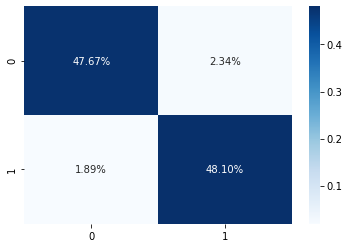

In [20]:
confusion_matrix=cm(y2_test,y_pred4)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix),annot=True,fmt=".2%",cmap="Blues")

## xgboost

In [47]:
xgb1_classifier = xgb.XGBClassifier()
xgb1_classifier.fit(x2_train,y2_train)

prediction1 = xgb1_classifier.predict(x2_test)

[13:21:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
print("Training Accuracy:",xgb1_classifier.score(x2_train,y2_train))
print("---------------------------------------------------------------")
print("Testing Accuracy:",acs(y2_test,prediction1))
print("---------------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,prediction1))
print("---------------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,prediction1))

Training Accuracy: 0.9622401104755566
---------------------------------------------------------------
Testing Accuracy: 0.957190828167223
---------------------------------------------------------------
confusion_matrix:
 [[93957  6708]
 [ 1910 98737]]
---------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96    100665
           1       0.94      0.98      0.96    100647

    accuracy                           0.96    201312
   macro avg       0.96      0.96      0.96    201312
weighted avg       0.96      0.96      0.96    201312



## Gradient Boosting Classifier

In [51]:
model8=gbc().fit(x2_train,y2_train)
p8=model8.predict(x2_test)

In [52]:
print("Training Accuracy:",model8.score(x2_train,y2_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y2_test,p8))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p8))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p8))

Training Accuracy: 0.9573285679158915
------------------------------------------------------------
Testing Accuracy: 0.9566543474805277
------------------------------------------------------------
confusion_matrix:
 [[93193  7472]
 [ 1254 99393]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96    100665
           1       0.93      0.99      0.96    100647

    accuracy                           0.96    201312
   macro avg       0.96      0.96      0.96    201312
weighted avg       0.96      0.96      0.96    201312



## Naive Bayes

In [32]:
gnb=GaussianNB()
model6=gnb.fit(x2_train, y2_train,sample_weight=100)  
p6=model6.predict(x2_test)

In [33]:
print("Training Accuracy:",model6.score(x2_train,y2_train))
print("----------------------------------------------------------------")
print("Testing Accuracy:",acs(y2_test,p6))
print("----------------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p6))
print("----------------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p6))

Training Accuracy: 0.90596414015096
----------------------------------------------------------------
Testing Accuracy: 0.9053111587982833
----------------------------------------------------------------
confusion_matrix:
 [[82393 18272]
 [  790 99857]]
----------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90    100665
           1       0.85      0.99      0.91    100647

    accuracy                           0.91    201312
   macro avg       0.92      0.91      0.90    201312
weighted avg       0.92      0.91      0.90    201312



## Light gbm

In [32]:
%%time

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt',
    num_leaves=500,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=500,
    subsample_for_bin=200000,
    objective='binary',
    
    min_child_samples=500,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)

lgbm.fit(x2_train, y2_train)
y_pred = lgbm.predict(x2_test)

Wall time: 1min 58s


In [33]:
print("Training Accuracy:",lgbm.score(x2_train,y2_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y2_test,y_pred))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,y_pred))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,y_pred))

Training Accuracy: 0.9969139865333079
------------------------------------------------------------
Testing Accuracy: 0.9618303926243841
------------------------------------------------------------
confusion_matrix:
 [[94511  6154]
 [ 1530 99117]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96    100665
           1       0.94      0.98      0.96    100647

    accuracy                           0.96    201312
   macro avg       0.96      0.96      0.96    201312
weighted avg       0.96      0.96      0.96    201312



##  Performance Measurement of models using roc curve

In [62]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y2_test, p12[:,], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y2_test, p13[:,], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y2_test, y_pred4[:,], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y2_test, prediction1[:,], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y2_test, p8[:,], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y2_test, y_pred[:,], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y2_test))]
p_fpr, p_tpr, _ = roc_curve(y2_test, random_probs, pos_label=1)

In [63]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y2_test, p12[:,])
auc_score2 = roc_auc_score(y2_test, p13[:,])
auc_score3 = roc_auc_score(y2_test, y_pred4[:,])
auc_score4 = roc_auc_score(y2_test, prediction1[:,])
auc_score5 = roc_auc_score(y2_test, p8[:,])
auc_score6 = roc_auc_score(y2_test, y_pred[:,])


print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5,auc_score6)

0.9181450752122814 0.947579058440482 0.9563181157561892 0.9571929588739221 0.9566571088810426 0.9619364370990856


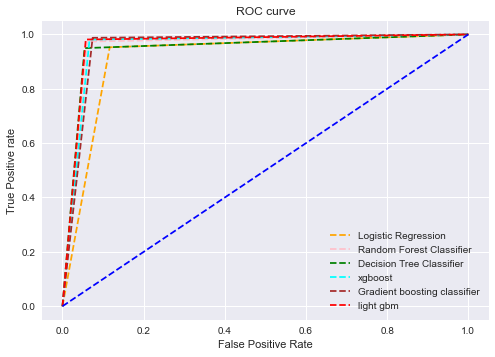

In [64]:
#matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='pink', label='Random Forest Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='cyan', label='xgboost')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='Gradient boosting classifier')
plt.plot(fpr6, tpr6, linestyle='--',color='red', label='light gbm')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### As Random forest classifier got the better accuracy so we are using this model for deployment.

In [53]:
import pickle
pickle_out = open('classifier1.pkl',"wb")
pickle.dump(classifier1,pickle_out)
pickle_out.close()